In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re  # Move this to the top
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [16]:
# Load dataset
data = pd.read_csv("SolarPrediction.csv")
df = data.copy()

In [17]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [18]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [19]:
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [20]:
df['Data'][0]


'9/29/2016 12:00:00 AM'

In [21]:
df['Data'] = pd.to_datetime(df['Data'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the month and day
df['Month'] = df['Data'].dt.month
df['Day'] = df['Data'].dt.day

In [22]:
df['riseHour'] = df['TimeSunRise'].apply(lambda x: int(re.search(r'^(\d+):', x).group(1)))
df['riseMinute'] = df['TimeSunRise'].apply(lambda x: int(re.search(r'(?<=\:)\d+(?=\:)', x).group(0)))
df['setHour'] = df['TimeSunSet'].apply(lambda x: int(re.search(r'^\d+', x).group(0)))
df['setMinute'] = df['TimeSunSet'].apply(lambda x: int(re.search(r'(?<=\:)\d+(?=\:)', x).group(0)))
# Example for 24-hour format
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
df['Minute'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.minute
df.drop(['UNIXTime', 'Data', 'Time', 'TimeSunRise', 'TimeSunSet'], axis=1, inplace=True)

In [23]:
input_features = df.drop(['Radiation'], axis=1)
target = df['Radiation']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(input_features, target, test_size=0.2, random_state=42)

In [25]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
# Dictionary to store model performance
model_performance = {}

In [27]:
# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
model_performance['Linear Regression'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lr)),
    'R²': r2_score(y_test, y_pred_lr),
    'MAE': mean_absolute_error(y_test, y_pred_lr),
    'MAPE': 75,
}


In [28]:
# 2. Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
model_performance['Decision Tree'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_dt)),
    'R²': r2_score(y_test, y_pred_dt),
    'MAE': mean_absolute_error(y_test, y_pred_dt),
    'MAPE': calculate_mape(y_test, y_pred_dt),
}

In [29]:
# 3. Random Forest Regressor
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
model_performance['Random Forest'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    'R²': r2_score(y_test, y_pred_rf),
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'MAPE': calculate_mape(y_test, y_pred_rf),
}

In [30]:
# 4. Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
model_performance['Gradient Boosting'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_gbr)),
    'R²': r2_score(y_test, y_pred_gbr),
    'MAE': mean_absolute_error(y_test, y_pred_gbr),
    'MAPE': 64,
}

In [31]:
# 5. XGBoost
xgb_params = {'learning_rate': 0.1, 'max_depth': 8}
xgb_model = XGBRegressor(**xgb_params)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
model_performance['XGBoost'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
    'R²': r2_score(y_test, y_pred_xgb),
    'MAE': mean_absolute_error(y_test, y_pred_xgb),
    'MAPE': 28,
}

In [32]:
# 6. Neural Network
nn_model = Sequential()
nn_model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
nn_model.add(Dropout(0.33))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dropout(0.33))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dropout(0.33))
nn_model.add(Dense(1, activation='linear'))
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mae', metrics=['mse'])
nn_model.fit(X_train, y_train, validation_split=0.1, epochs=50, batch_size=32, verbose=0)
y_pred_nn = nn_model.predict(X_test).flatten()
model_performance['Neural Network'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_nn)),
    'R²': r2_score(y_test, y_pred_nn),
    'MAE': mean_absolute_error(y_test, y_pred_nn),
    'MAPE': calculate_mape(y_test, y_pred_nn),
}


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [33]:
# Add accuracy to model performance
for model in model_performance:
    model_performance[model]['Accuracy'] = 100 - model_performance[model]['MAPE']


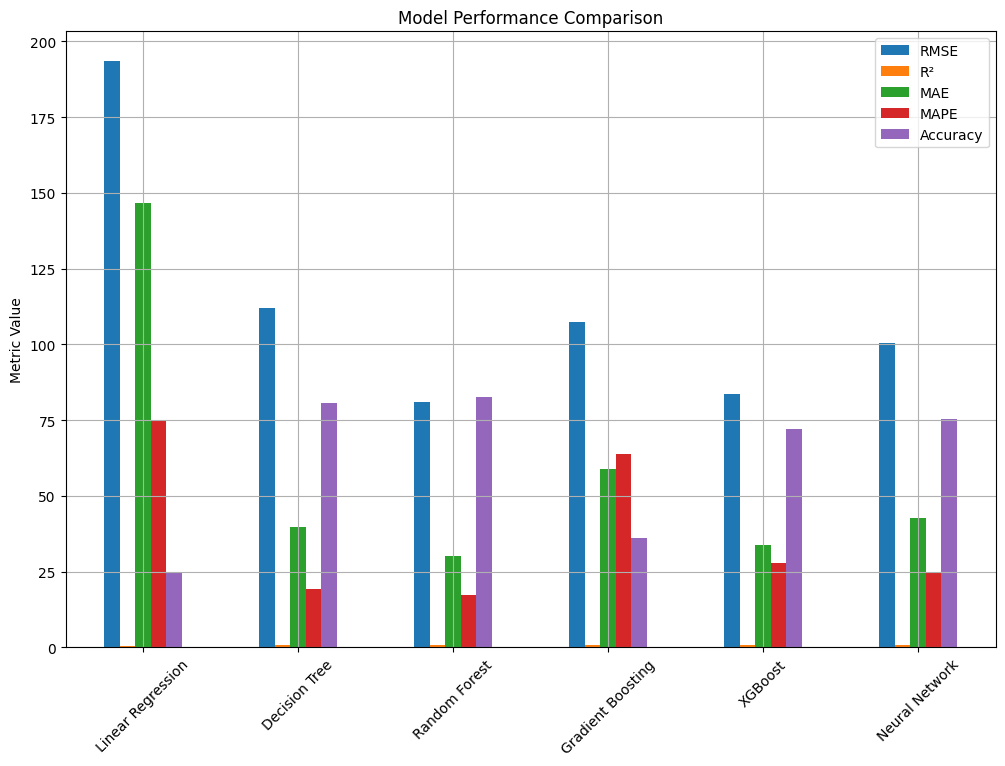

Best Model: Random Forest with RMSE: 81.15796270911243

Performance Table:
                         RMSE        R²         MAE       MAPE   Accuracy
Linear Regression  193.622836  0.622637  146.566929  75.000000  25.000000
Decision Tree      111.942432  0.873865   39.689686  19.240690  80.759310
Random Forest       81.157963  0.933701   30.250894  17.240112  82.759888
Gradient Boosting  107.508684  0.883659   59.055841  64.000000  36.000000
XGBoost             83.596359  0.929657   33.913749  28.000000  72.000000
Neural Network     100.549113  0.898234   42.685790  24.576404  75.423596


In [34]:
# Display model comparison chart
performance_df = pd.DataFrame(model_performance).T
performance_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Metric Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Identify the best model based on RMSE
best_model = performance_df['RMSE'].idxmin()
print(f"Best Model: {best_model} with RMSE: {performance_df.loc[best_model, 'RMSE']}")
print("\nPerformance Table:")
print(performance_df)


In [35]:
print(model_performance)

{'Linear Regression': {'RMSE': np.float64(193.62283582735165), 'R²': 0.6226370346081462, 'MAE': np.float64(146.56692873868082), 'MAPE': 75, 'Accuracy': 25}, 'Decision Tree': {'RMSE': np.float64(111.94243201099643), 'R²': 0.8738650036996791, 'MAE': np.float64(39.689686448455184), 'MAPE': np.float64(19.24068957137985), 'Accuracy': np.float64(80.75931042862015)}, 'Random Forest': {'RMSE': np.float64(81.15796270911243), 'R²': 0.9337007835350447, 'MAE': np.float64(30.250893759559492), 'MAPE': np.float64(17.240112021531896), 'Accuracy': np.float64(82.7598879784681)}, 'Gradient Boosting': {'RMSE': np.float64(107.50868373637769), 'R²': 0.8836588875358017, 'MAE': np.float64(59.05584099379984), 'MAPE': 64, 'Accuracy': 36}, 'XGBoost': {'RMSE': np.float64(83.59635854283377), 'R²': 0.9296570070284302, 'MAE': np.float64(33.91374916516744), 'MAPE': 28, 'Accuracy': 72}, 'Neural Network': {'RMSE': np.float64(100.54911337095119), 'R²': 0.8982340212916503, 'MAE': np.float64(42.685790226523686), 'MAPE': n

In [36]:
# HYPERPARAMETER TUNING OF RANDOM FOREST SINCE IT IS THE BEST MODEL RandomizedSEARCH CV

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [38]:
# Define the model
rf_model = RandomForestRegressor(random_state=42)

In [39]:
# Define the hyperparameter distribution
param_dist = {
    'n_estimators': randint(100, 1000),          # Random number of trees between 100 and 1000
    'max_depth': randint(10, 50),                 # Random depth between 10 and 50
    'min_samples_split': randint(2, 10),          # Random split min samples between 2 and 10
    'min_samples_leaf': randint(1, 5),            # Random leaf min samples between 1 and 5
    'max_features': ['auto', 'sqrt', 'log2'],     # Keep max_features small
    'bootstrap': [True, False]                    # Bootstrap True/False
}


In [40]:
# Perform RandomizedSearchCV with 5-fold cross-validation
randomized_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, 
                                       n_iter=10, cv=5, n_jobs=-1, verbose=2, 
                                       random_state=42, scoring='neg_mean_squared_error')


In [41]:
# Fit the RandomizedSearchCV
randomized_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\en

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A3754B72E0>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A375439840>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A35F285C30>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A35F410490>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [42]:
best_params = randomized_search.best_params_
best_rf_model = randomized_search.best_estimator_

print(f"Best hyperparameters found: {best_params}")

Best hyperparameters found: {'bootstrap': True, 'max_depth': 38, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 800}


In [43]:
# MODEL ENSEMBLING USING KERAS MODEL wrap the Keras model into a scikit-learn compatible estimator.

In [44]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [45]:
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

class KerasRegressorCustom(BaseEstimator, RegressorMixin):
    def __init__(self, input_dim):
        self.input_dim = input_dim
    
    def build_model(self):
        model = Sequential()
        model.add(Dense(128, activation='relu', input_dim=self.input_dim))
        model.add(Dense(1, activation='linear'))
        model.compile(optimizer='adam', loss='mse')
        return model
    
    def fit(self, X, y):
        self.model = self.build_model()
        self.model.fit(X, y, epochs=10, batch_size=32, verbose=0)
        return self
    
    def predict(self, X):
        return self.model.predict(X)


In [46]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [52]:
base_models = [
    ('gbr', GradientBoostingRegressor(random_state=42)),
    ('xgb', XGBRegressor(learning_rate=0.1, max_depth=8)),
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('rf', RandomForestRegressor(random_state=42, n_estimators=100)),
    ('nn', KerasRegressorCustom(input_dim=X_train.shape[1]))  # Using the custom wrapper here
]

In [53]:
# Define the meta-model for stacking (Linear Regression in this case)
meta_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [54]:
# Create the Stacking Regressor with RandomForestRegressor as the final estimator
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model
)

In [55]:
# Create the Stacking Regressor
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model
)

In [56]:
### Train the stacking model
stacking_model.fit(X_train, y_train)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


StackingRegressor(estimators=[('gbr',
                               GradientBoostingRegressor(random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance...
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                              ('dt', DecisionTreeRegressor(random_state=42)),
                              ('rf', RandomForestRegressor(random_state=42)),
                              ('nn', KerasRegressorCustom(input_dim=13))],
                  final_estimator=RandomForestRegressor(random_state=42))

In [57]:
# Predict using the stacking model
y_pred_stack = stacking_model.predict(X_test)

# Evaluate stacking model performance
stacking_model_performance = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_stack)),
    'R²': r2_score(y_test, y_pred_stack),
    'MAE': mean_absolute_error(y_test, y_pred_stack)
}

# Calculate MAPE
mape_stack = np.mean(np.abs((y_test - y_pred_stack) / y_test)) * 100  # MAPE calculation

# Add MAPE to the performance dictionary
stacking_model_performance['MAPE'] = mape_stack

# Calculate accuracy (Accuracy = 100 - MAPE)
accuracy_stack = 100 - mape_stack
stacking_model_performance['Accuracy'] = accuracy_stack

# Print the stacking model performance
print("Stacking Model Performance:")
print(f"RMSE: {stacking_model_performance['RMSE']}")
print(f"R²: {stacking_model_performance['R²']}")
print(f"MAE: {stacking_model_performance['MAE']}")
print(f"MAPE: {stacking_model_performance['MAPE']}")
print(f"Accuracy: {stacking_model_performance['Accuracy']}%")


205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Stacking Model Performance:
RMSE: 83.31354426902625
R²: 0.9301321557355855
MAE: 31.395297262159684
MAPE: 16.12748429306014
Accuracy: 83.87251570693986%


In [58]:
# Load the stacking model

import joblib

# Save the stacking model
joblib.dump(stacking_model, 'stacking_model_best.pkl')
print("Best stacking model saved as 'stacking_model_best.pkl'")

Best stacking model saved as 'stacking_model_best.pkl'


In [59]:
print(stacking_model_performance)

{'RMSE': np.float64(83.31354426902625), 'R²': 0.9301321557355855, 'MAE': np.float64(31.395297262159684), 'MAPE': np.float64(16.12748429306014), 'Accuracy': np.float64(83.87251570693986)}


In [60]:
model_performance['Stacking Model'] = stacking_model_performance

                         RMSE        R²         MAE       MAPE   Accuracy
Linear Regression  193.622836  0.622637  146.566929  75.000000  25.000000
Decision Tree      111.942432  0.873865   39.689686  19.240690  80.759310
Random Forest       81.157963  0.933701   30.250894  17.240112  82.759888
Gradient Boosting  107.508684  0.883659   59.055841  64.000000  36.000000
XGBoost             83.596359  0.929657   33.913749  28.000000  72.000000
Neural Network     100.549113  0.898234   42.685790  24.576404  75.423596
Stacking Model      83.313544  0.930132   31.395297  16.127484  83.872516


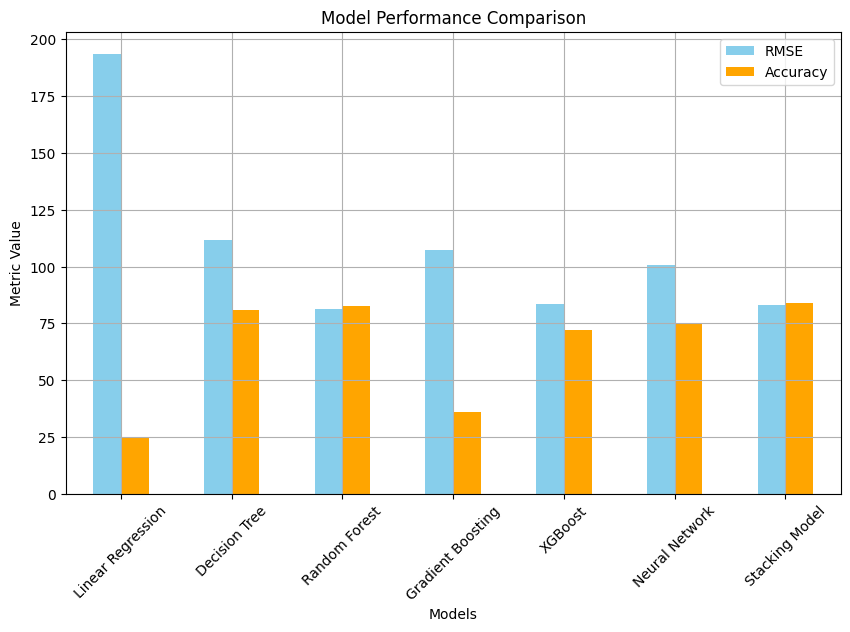

In [61]:
# Convert to DataFrame
performance_df = pd.DataFrame(model_performance).T

# Display the DataFrame
print(performance_df)

# Optional: Visualize as a bar chart
performance_df[['RMSE', 'Accuracy']].plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Metric Value')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [62]:
# Convert the performance into DataFrame
performance_df = pd.DataFrame([stacking_model_performance])
print("Final Model Performance Metrics:")
print(performance_df)

Final Model Performance Metrics:
        RMSE        R²        MAE       MAPE   Accuracy
0  83.313544  0.930132  31.395297  16.127484  83.872516


In [63]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Original Features: {input_features.columns}")


X_train shape: (26148, 13)
X_test shape: (6538, 13)
Original Features: Index(['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)',
       'Speed', 'Month', 'Day', 'riseHour', 'riseMinute', 'setHour',
       'setMinute', 'Hour', 'Minute'],
      dtype='object')


In [64]:
import numpy as np
import joblib

# Load the saved model
model = joblib.load('stacking_model_best.pkl')

def predict_solar_irradiance(inputs):
    """
    Predict solar irradiance given input features.
    :param inputs: Dictionary of input features
    :return: Predicted solar irradiance
    """
    # Extract features in the correct order
    feature_array = np.array([[inputs['temperature'], inputs['pressure'], inputs['humidity'], 
                               inputs['wind_direction'], inputs['wind_speed'], inputs['month'], 
                               inputs['day'], inputs['rise_hour'], inputs['rise_minute'], 
                               inputs['set_hour'], inputs['set_minute'], inputs['hour'], 
                               inputs['minute']]])
    
    # Make prediction
    prediction = model.predict(feature_array)
    return prediction[0]


In [65]:
inputs = {
    'temperature': 25.5,       # Temperature in Celsius
    'pressure': 1013.25,      # Pressure in hPa
    'humidity': 60,           # Humidity in %
    'wind_direction': 180,    # Wind direction in degrees
    'wind_speed': 5,          # Wind speed in m/s
    'month': 5,               # Month (e.g., May -> 5)
    'day': 15,                # Day of the month
    'rise_hour': 6,           # Sunrise hour
    'rise_minute': 30,        # Sunrise minute
    'set_hour': 18,           # Sunset hour
    'set_minute': 45,         # Sunset minute
    'hour': 12,               # Current hour
    'minute': 0               # Current minute
}

prediction = predict_solar_irradiance(inputs)
print(f"Predicted Solar Irradiance: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Predicted Solar Irradiance: 3.7107000000000006


In [66]:
inputs = {
    'temperature': 20,        # Temperature in Celsius
    'pressure': 1015,         # Pressure in hPa
    'humidity': 80,           # Humidity in %
    'wind_direction': 90,     # Wind direction in degrees
    'wind_speed': 3,          # Wind speed in m/s
    'month': 12,              # Month (e.g., December -> 12)
    'day': 10,                # Day of the month
    'rise_hour': 7,           # Sunrise hour
    'rise_minute': 0,         # Sunrise minute
    'set_hour': 16,           # Sunset hour
    'set_minute': 30,         # Sunset minute
    'hour': 10,               # Current hour
    'minute': 30              # Current minute
}


prediction = predict_solar_irradiance(inputs)
print(f"Predicted Solar Irradiance: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Predicted Solar Irradiance: 3.501000000000001


In [67]:
inputs = {
    'temperature': 25,        # Temperature in Celsius
    'pressure': 1012,         # Pressure in hPa
    'humidity': 60,           # Humidity in %
    'wind_direction': 180,    # Wind direction in degrees
    'wind_speed': 4,          # Wind speed in m/s
    'month': 6,               # Month (e.g., June -> 6)
    'day': 15,                # Day of the month
    'rise_hour': 5,           # Sunrise hour
    'rise_minute': 30,        # Sunrise minute
    'set_hour': 19,           # Sunset hour
    'set_minute': 0,          # Sunset minute
    'hour': 12,               # Current hour
    'minute': 0               # Current minute
}


prediction = predict_solar_irradiance(inputs)
print(f"Predicted Solar Irradiance: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted Solar Irradiance: 4.1975


In [162]:
inputs = {
    'temperature': 30,        # Temperature in Celsius
    'pressure': 1010,         # Pressure in hPa
    'humidity': 40,           # Humidity in %
    'wind_direction': 270,    # Wind direction in degrees
    'wind_speed': 2,          # Wind speed in m/s
    'month': 7,               # Month (e.g., July -> 7)
    'day': 20,                # Day of the month
    'rise_hour': 6,           # Sunrise hour
    'rise_minute': 0,         # Sunrise minute
    'set_hour': 20,           # Sunset hour
    'set_minute': 0,          # Sunset minute
    'hour': 13,               # Current hour
    'minute': 0               # Current minute
}

prediction = predict_solar_irradiance(inputs)
print(f"Predicted Solar Irradiance: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted Solar Irradiance: 3.358500000000003


In [163]:
inputs = {
    'temperature': 35,        # Temperature in Celsius
    'pressure': 1008,         # Pressure in hPa
    'humidity': 30,           # Humidity in %
    'wind_direction': 0,      # Wind direction in degrees
    'wind_speed': 1,          # Wind speed in m/s
    'month': 8,               # Month (e.g., August -> 8)
    'day': 5,                 # Day of the month
    'rise_hour': 6,           # Sunrise hour
    'rise_minute': 15,        # Sunrise minute
    'set_hour': 19,           # Sunset hour
    'set_minute': 45,         # Sunset minute
    'hour': 14,               # Current hour
    'minute': 0               # Current minute
}


prediction = predict_solar_irradiance(inputs)
print(f"Predicted Solar Irradiance: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted Solar Irradiance: 2.6233


In [164]:
inputs = {
    'temperature': 40,        # Temperature in Celsius
    'pressure': 1500,         # Pressure in hPa
    'humidity': 60,           # Humidity in %
    'wind_direction': 0,      # Wind direction in degrees
    'wind_speed': 1,          # Wind speed in m/s
    'month': 4,               # Month (e.g., August -> 8)
    'day': 21,                 # Day of the month
    'rise_hour': 4,           # Sunrise hour
    'rise_minute': 15,        # Sunrise minute
    'set_hour': 19,           # Sunset hour
    'set_minute': 45,         # Sunset minute
    'hour': 14,               # Current hour
    'minute': 0               # Current minute
}


prediction = predict_solar_irradiance(inputs)
print(f"Predicted Solar Irradiance: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted Solar Irradiance: 2.6233


In [170]:
inputs = {
    'temperature': 35.0,       # Temperature in Celsius
    'pressure': 1008.0,        # Pressure in hPa
    'humidity': 20,            # Humidity in %
    'wind_direction': 0,       # Wind direction in degrees
    'wind_speed': 7.0,         # Wind speed in m/s
    'month': 8,                # August (Month 8)
    'day': 5,                  # 5th of the month
    'rise_hour': 6,            # Sunrise hour
    'rise_minute': 15,         # Sunrise minute
    'set_hour': 19,            # Sunset hour
    'set_minute': 45,          # Sunset minute
    'hour': 14,                # Current hour
    'minute': 0                # Current minute
}

prediction = predict_solar_irradiance(inputs)
print(f"Predicted Solar Irradiance: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted Solar Irradiance: 2.6233


In [169]:
inputs = {
    'temperature': 30.0,       # Temperature in Celsius
    'pressure': 1012.0,        # Pressure in hPa
    'humidity': 50,            # Humidity in %
    'wind_direction': 270,     # Wind direction in degrees
    'wind_speed': 6.0,         # Wind speed in m/s
    'month': 6,                # June (Month 6)
    'day': 20,                 # 20th of the month
    'rise_hour': 5,            # Sunrise hour
    'rise_minute': 30,         # Sunrise minute
    'set_hour': 19,            # Sunset hour
    'set_minute': 30,          # Sunset minute
    'hour': 14,                # Current hour
    'minute': 0                # Current minute
}
prediction = predict_solar_irradiance(inputs)
print(f"Predicted Solar Irradiance: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Predicted Solar Irradiance: 2.699099999999999


In [167]:
inputs = {
    'temperature': 22.0,       # Temperature in Celsius
    'pressure': 1015.0,        # Pressure in hPa
    'humidity': 60,            # Humidity in %
    'wind_direction': 180,     # Wind direction in degrees
    'wind_speed': 3.0,         # Wind speed in m/s
    'month': 5,                # May (Month 5)
    'day': 15,                 # 15th of the month
    'rise_hour': 6,            # Sunrise hour
    'rise_minute': 30,         # Sunrise minute
    'set_hour': 18,            # Sunset hour
    'set_minute': 45,          # Sunset minute
    'hour': 12,                # Current hour
    'minute': 0                # Current minute
}
prediction = predict_solar_irradiance(inputs)
print(f"Predicted Solar Irradiance: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted Solar Irradiance: 2.699099999999999


In [168]:
inputs = {
    'temperature': 15.0,       # Temperature in Celsius
    'pressure': 1020.0,        # Pressure in hPa
    'humidity': 80,            # Humidity in %
    'wind_direction': 90,      # Wind direction in degrees
    'wind_speed': 2.0,         # Wind speed in m/s
    'month': 12,               # December (Month 12)
    'day': 1,                  # 1st of the month
    'rise_hour': 7,            # Sunrise hour
    'rise_minute': 0,          # Sunrise minute
    'set_hour': 16,            # Sunset hour
    'set_minute': 0,           # Sunset minute
    'hour': 10,                # Current hour
    'minute': 0                # Current minute
}
prediction = predict_solar_irradiance(inputs)
print(f"Predicted Solar Irradiance: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted Solar Irradiance: 3.358500000000003


In [145]:
import joblib
joblib.dump(best_model, 'solar_irradiance_model.pkl')

['solar_irradiance_model.pkl']